# DEPLOY A ML MODEL AS AN API

In [ ]:
import pandas as pd
import numpy as np

Dataset - https://www.kaggle.com/datasets/ritesaluja/bank-note-authentication-uci-data

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

In [ ]:
df=pd.read_csv('/content/BankNote_Authentication.csv')
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In the context of banknote analysis, "**variance**," "**kurtosis**," "**skewness**," and "**entropy**" are statistical measures extracted from the image of a banknote, used to describe the distribution of pixel intensity variations, which can help identify whether a note is genuine or counterfeit, with **variance** indicating how spread out the pixel values are, **skewness** measuring the asymmetry of the pixel distribution, **kurtosis** reflecting the "peakedness" of the distribution, and **entropy** representing the randomness or complexity of the image patterns; essentially, these features help differentiate between the consistent patterns of a real banknote and the irregularities of a fake one.

In [ ]:
#Independet and Dependent Features
X=df.iloc[:,:-1] #Variance, Skewness, Kurtosis, entropy
y=df.iloc[:,-1] #class 0-True note, 1-Fake note

In [ ]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y.head(10)

,class
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [ ]:
#Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
#Implementing Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Prediction
y_pred=classifier.predict(X_test)

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)
score

0.9902912621359223

In [ ]:
#Creating Pickle file
import pickle
pickle_out = open("classifier.pkl","wb") #wb - write binary mode - for saving non-text data like machine learning models
#data is written as a sequence of bytes, preserving the object's structure and data types.
pickle.dump(classifier, pickle_out) #saving the model - serializes classifier and writes it to pickle_out file
pickle_out.close()

In Python, we sometimes need to save the object on the disk for later use. This can be done by using Python **pickle**. Python pickle module is used for **serializing** and **de-serializing** a Python object structure. Any object in Python can be pickled so that it can be **saved on disk**.

In Python, we work with high-level data structures such as lists, tuples, and sets. However, when we want to store these objects in memory, they need to be converted into a sequence of bytes (Byte Stream) that the computer can understand. This process is called **serialization**. When dealing with more complex data types like dictionaries, data frames, and nested lists, serialization allows the user to preserve the object’s original state without losing any relevant information.

The next time we want to access the same data structure, this sequence of bytes (Byte Stream) must be converted back into the high-level object in a process known as **de-serialization**.

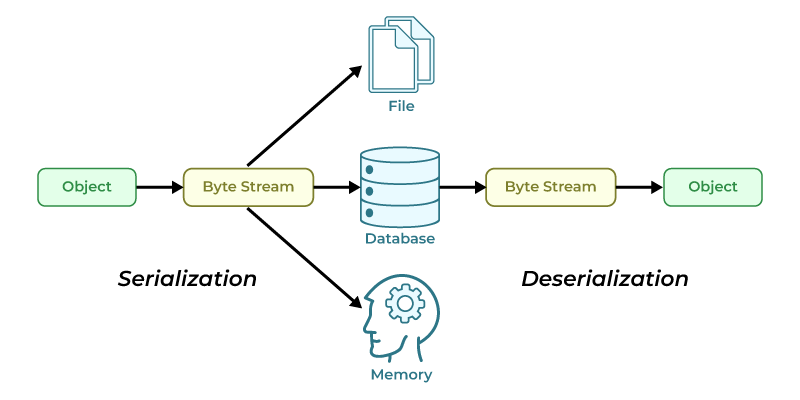



In [ ]:
import numpy as np
classifier.predict([[2,3,4,1]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])